## Imports

Begin by importing the required libraries.

In [91]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [92]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Import the required datasets.

In [93]:
CPart1 = pd.read_csv("./datasets/CPart1.csv", header=0)
CPart1Merge = pd.read_csv("./datasets/CPart1Merge.csv", header=0)
CPart2a = pd.read_csv("./datasets/CPart2a.csv", header=0)
CPart2b = pd.read_csv("./datasets/CPart2b.csv", header=0)
CPart3 = pd.read_csv("./datasets/CPart3.csv", header=0)
benchmarkD = pd.read_csv("./datasets/benchmarkD.csv", header=0)
benchmarkDMerge = pd.read_csv("./datasets/bencmarkDMerge.csv", header=0)
OptimalS = pd.read_csv("./datasets/OptimalS.csv", header=0)

## C Part 1

Plot the number of key comparisons against array size for both hybrid and pure merge sort algorithms.

[Text(0.5, 1.0, 'Comparison Plot of Number of Key Comparisons against Array Size for S = 16\nbetween Merge Insertion Sort and Merge Sort')]

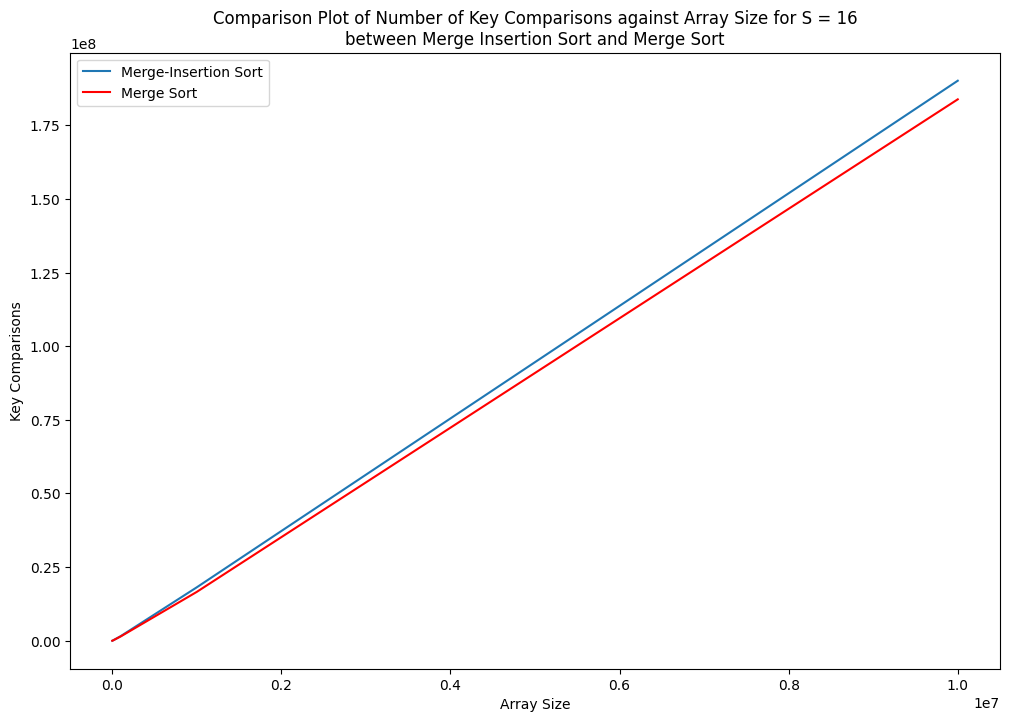

In [94]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart1, 
                   x="Array Size", 
                   y="Key Comparisons", 
                   label="Merge-Insertion Sort")
sb.lineplot(data= CPart1Merge, 
            x="Array Size", 
            y="Key Comparisons", 
            label="Merge Sort",
            color="red")

plot.set(title="Comparison Plot of Number of Key Comparisons against Array Size for S = 16\nbetween Merge Insertion Sort and Merge Sort")

Plot the elapsed time against array size for both hybrid and pure merge sort algorithms.

[Text(0.5, 1.0, 'Comparison Plot of Elapsed Time against Array Size for S = 16\nbetween Merge Insertion Sort and Merge Sort')]

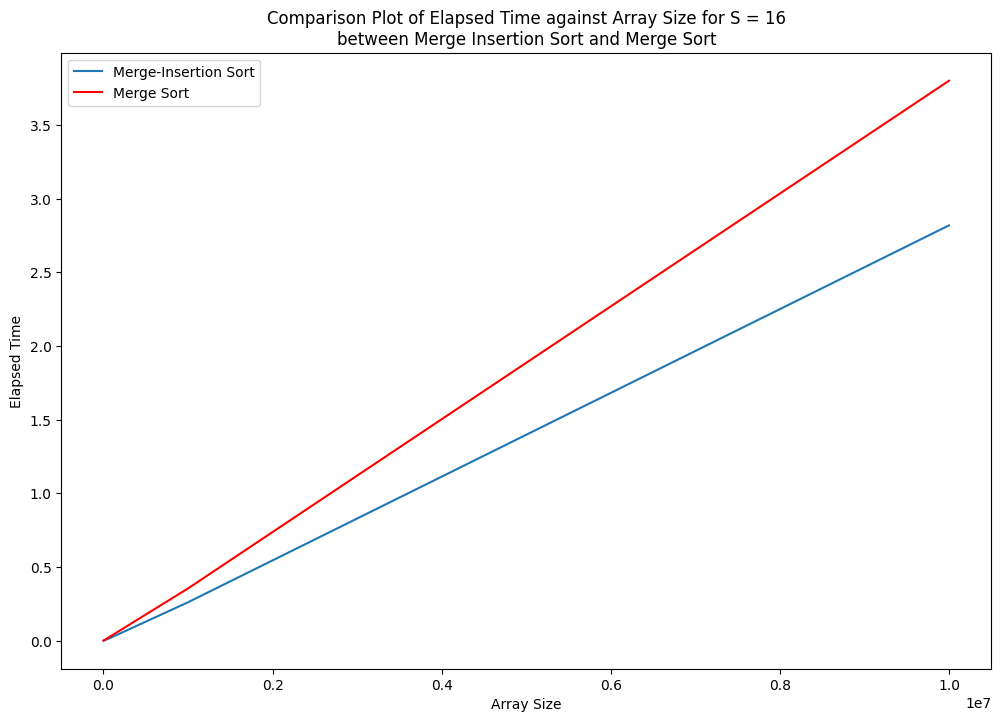

In [95]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart1, 
                   x="Array Size", 
                   y="Elapsed Time", 
                   label="Merge-Insertion Sort")
sb.lineplot(data= CPart1Merge, 
            x="Array Size", 
            y="Elapsed Time", 
            label="Merge Sort",
            color="red")

plot.set(title="Comparison Plot of Elapsed Time against Array Size for S = 16\nbetween Merge Insertion Sort and Merge Sort")

#### Hypothesis

Using the hybrid algorithm, we perform Insertion Sort when the size of the array is below a threshold *s*. Then, we are performing Insertion Sort on *n*/*s* arrays, where each array is size *s*. 

We know the average and worst-case time complexity of Insertion Sort is ***O(s<sup>2</sup>)***. Thus, the total time complexity of the Insertion Sort component of our hybrid algorithm is:
> *n*/*s* x ***O(s<sup>2</sup>)*** <br>
> = ***O(ns)***

If we consider the best-case, then the total time complexity will be:
> *n*/*s* x ***O(s)*** <br>
> = ***O(n)***

Next, we perform the Merge operation on the sorted arrays. In traditional Merge Sort, this Merge operation is called on *log n* levels. However, since we switched to Insertion Sort when array size is *s*, the Merge operation is only called on *log* (*n*/*s*) levels.

Each level compares *n* elements. Therefore, the total time complexity of the Merge Sort component of our hybrid algorithm is:
> *n* x *log* (*n*/*s*)
> = ***O(n log (n/s))***

Hence, the total time complexity of the hybrid algorithm is:

* At worst and average-case: ***O(ns + n log (n/s))***

* At best-case: ***O(n + n log (n/s))***

#### Compare with Empirical Data

When *s* is fixed, the time complexity of the hybrid algorithm can be simplified to ***O(n + n log n)*** = ***O(n log n)***, so long as *s* does not approach *n*.

Since we set our *s* to be very small (16 compared to 1000 x 10<sup>x</sup>), we expect our time complexity to be ***O(n log n)***.

Indeed, following the comparison plot of both key comparisons and elapsed time, the hybrid algorithm does show a time complexity which is similar to the pure merge sort algorithm of ***O(n log n)***. 

**Additional Note(s)**

* We note that the hybrid algorithm does more key comparisons than the merge sort algorithm. This is to be expected since the hybrid algorithm incorporated the Insertion Sort algorithm, whose runtime is ***O(n<sup>2</sup>)*** => more key comparisons than ***O(n log n)***.

* We note that the hybrid algorithm has a lower elapsed time than the merge sort algorithm. This is also to be expected since Insertion Sort has a lower constant factor. Thus, the small sub-arrays are sorted more quickly using Insertion Sort, resulting in lesser elapsed time.

## C Part 2

Plot the number of key comparisons against threshold size for the hybrid merge sort algorithm.

[Text(0.5, 1.0, 'Plot of Number of Key Comparisons against Threshold Size for Array Size = 10 mil\n Threshold Size in Multiples of 2')]

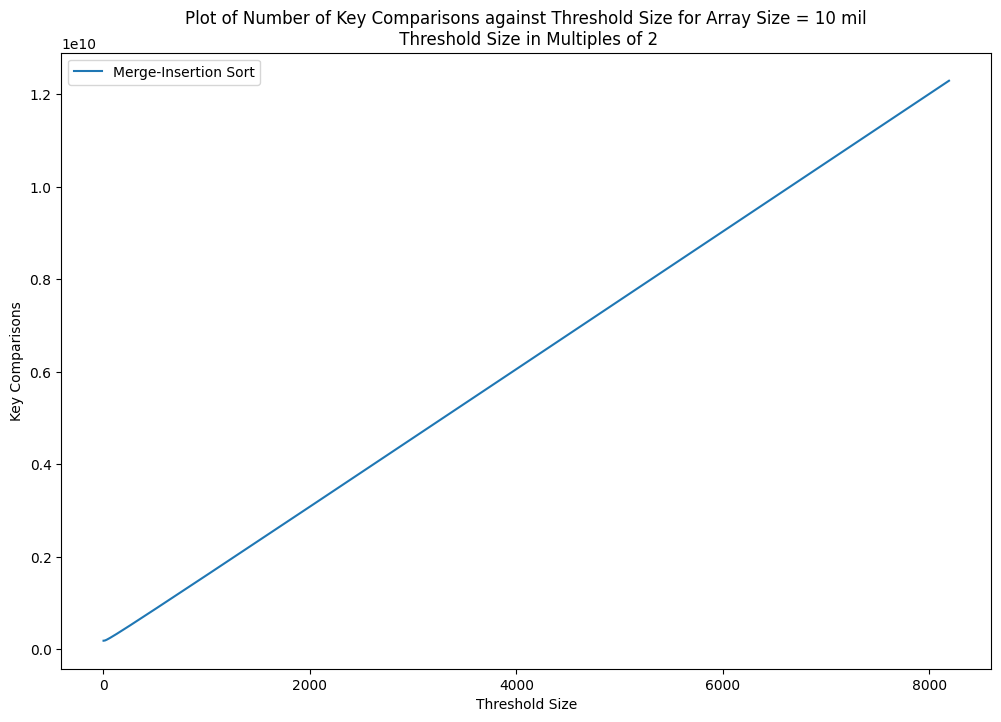

In [96]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart2a, 
                   x="Threshold Size", 
                   y="Key Comparisons", 
                   label="Merge-Insertion Sort")

plot.set(title="Plot of Number of Key Comparisons against Threshold Size for Array Size = 10 mil\n Threshold Size in Multiples of 2")

Plot the elapsed time against threshold size for the hybrid merge sort algorithm.

[Text(0.5, 1.0, 'Plot of Elapsed Time against Threshold Size for Array Size = 10 mil\n Threshold Size in Multiples of 2')]

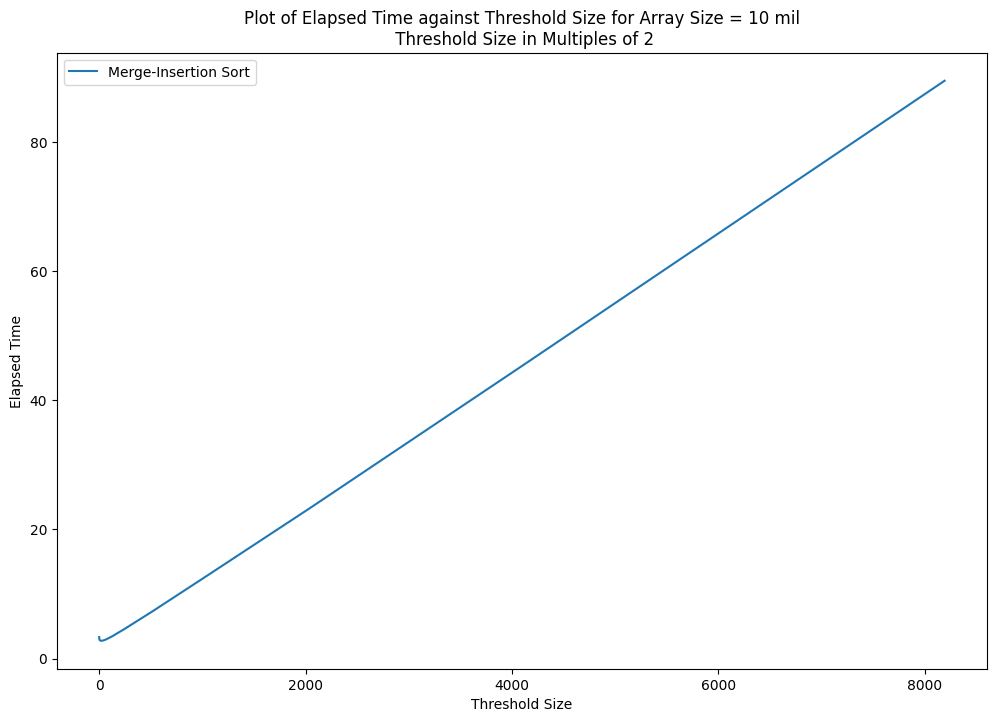

In [97]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart2a, 
                   x="Threshold Size", 
                   y="Elapsed Time", 
                   label="Merge-Insertion Sort")

plot.set(title="Plot of Elapsed Time against Threshold Size for Array Size = 10 mil\n Threshold Size in Multiples of 2")

#### Compare with empirical data

From Part 1 we have derived the time complexity of our hybrid algorithm to be ***O(ns + n log (n/s))*** (we consider only the worst and average-case).

With the value of *n* fixed, the time complexity can be simplified to ***O(s)***, so long as *n* does not approach *s*.

Since our *n* is set to 10 million and *s* is set to have an upper limit of 10000, we expect the time complexity to be linear.

Indeed, following the plot of both key comparisons and elapsed time, the hybrid algorithm does show a linear time complexity. 

**Additional Note(s)**

* We note that the hybrid algorithm has a threshold value such that it uses minimum time to complete the sorting. Such threshold value should lie somewhere between 1 to 100, as indicated by a minimum region in the elapsed time plot.

We shall examine this region close-up.

[Text(0.5, 1.0, 'Plot of Key Comparisons against Threshold Size for Array Size = 10 mil\n Threshold Size Increments by 1')]

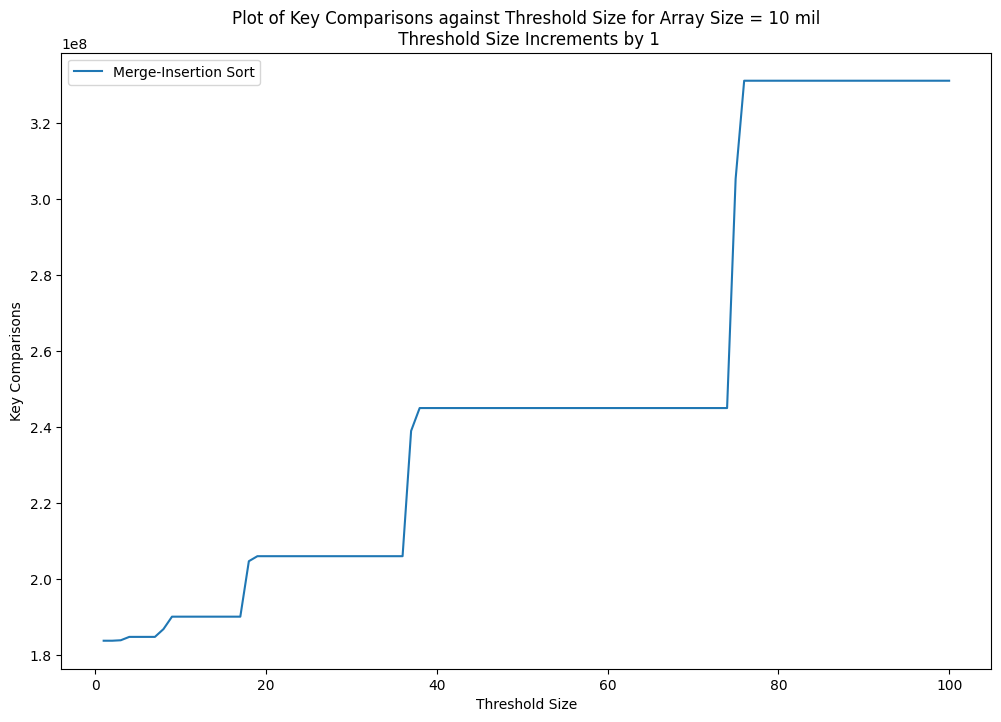

In [98]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart2b, 
                   x="Threshold Size", 
                   y="Key Comparisons", 
                   label="Merge-Insertion Sort")

plot.set(title="Plot of Key Comparisons against Threshold Size for Array Size = 10 mil\n Threshold Size Increments by 1")

[Text(0.5, 1.0, 'Plot of Elapsed Time against Threshold Size for Array Size = 10 mil\n Threshold Size Increments by 1')]

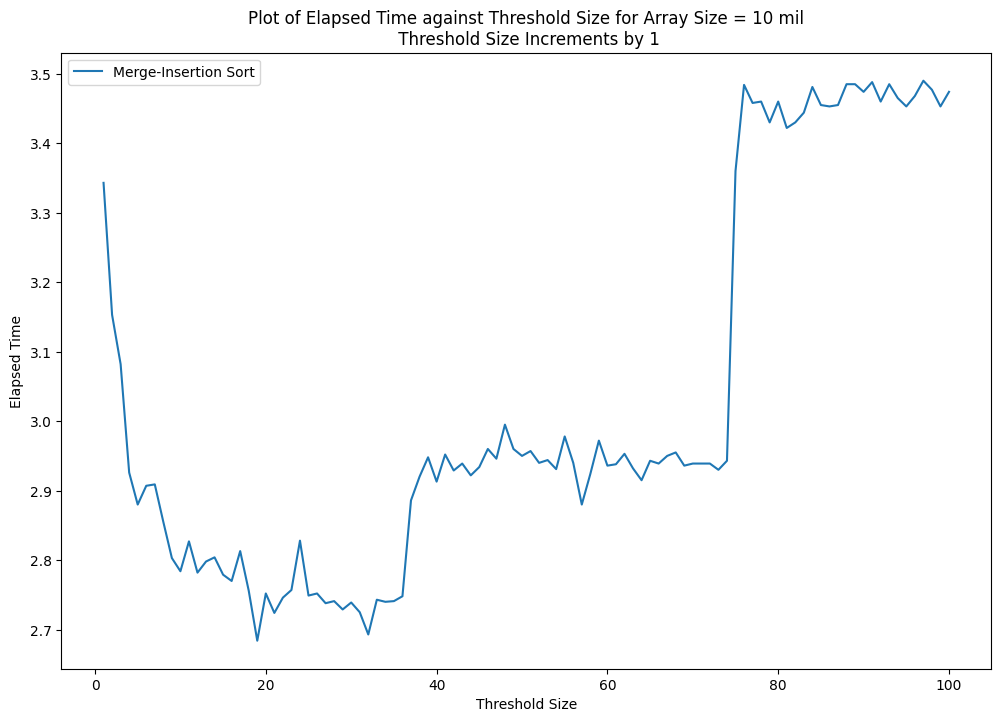

In [99]:
plt.figure(figsize=(12, 8))

plot = sb.lineplot(data= CPart2b, 
                   x="Threshold Size", 
                   y="Elapsed Time", 
                   label="Merge-Insertion Sort")

plot.set(title="Plot of Elapsed Time against Threshold Size for Array Size = 10 mil\n Threshold Size Increments by 1")

The plot of number of key comparisons against the threshold size presents a staircase pattern. This can be explained as follows:

>Consider an array of size *n*, and set the threshold to be *s* = *n*/*k*. The following binary tree structure illustrates the top-down approach of *mergesort* method.

> <img src="./media/Illustration.png">


When the *mergesort* method splits the array into *k* *n*/*k*-sized subarrays, the Insertion Sort method is called since the array size is now ≤ *s*.

Now suppose we change the value of *s* to be such that 2*n*/*k* < *s* < *n*/*k*. Notice that since subarray of size 2*n*/*k* is bigger than *s*, the Insertion Sort algorithm will still be called on the level of array size *n*/*k*.

Now suppose we change the value of *s* to be 2*n*/*k*. Then, the Insertion Sort aalgorithm will be invoked on the level of array size 2*n*/*k* instead. 

This shows that whenever the value of *s* is strictly between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort method called is the same => the number of key comparisons is the same. 

This explains the staircase pattern shown in the plot, where the **leveled** region is when 2*n*/*k* ≤ *s* ≤ *n*/*k* and the **spike** region is when *s* = 2*n*/*k* or *s* = *n*/*k*.

We shall determine the optimal threshold value in C Part 3.

## C Part 3

Plot the elapsed time against threshold size for different array sizes.

[Text(0.5, 1.0, 'Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1')]

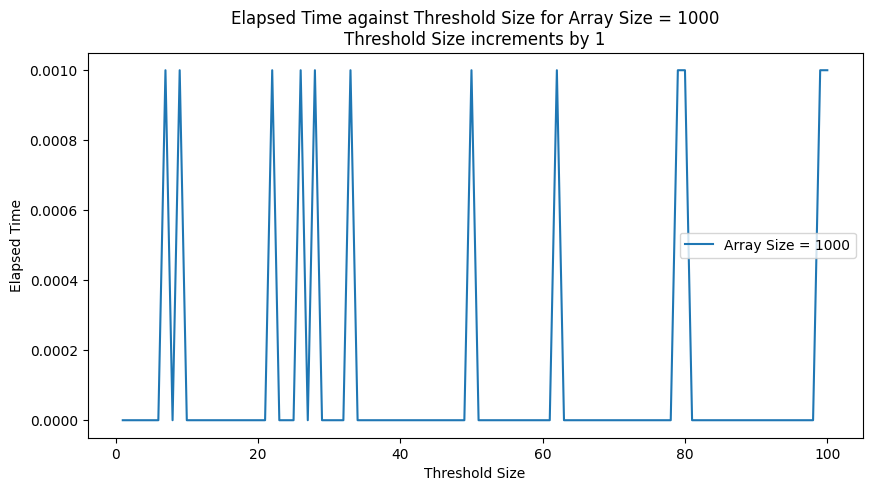

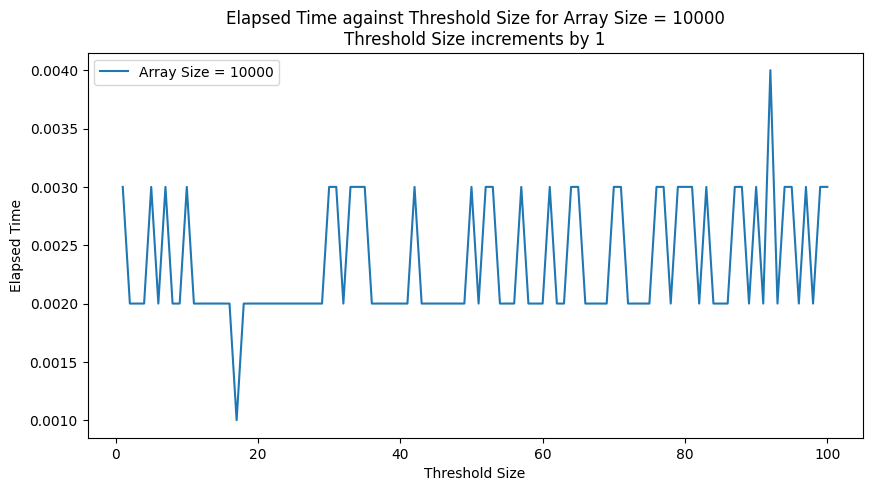

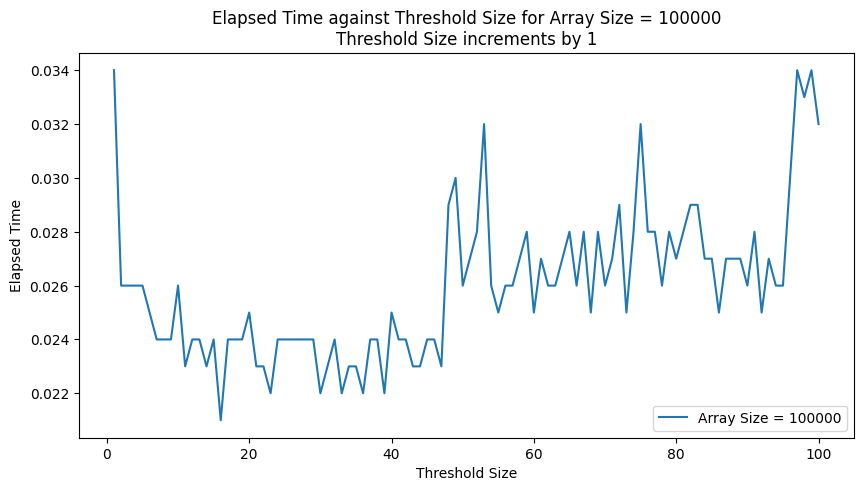

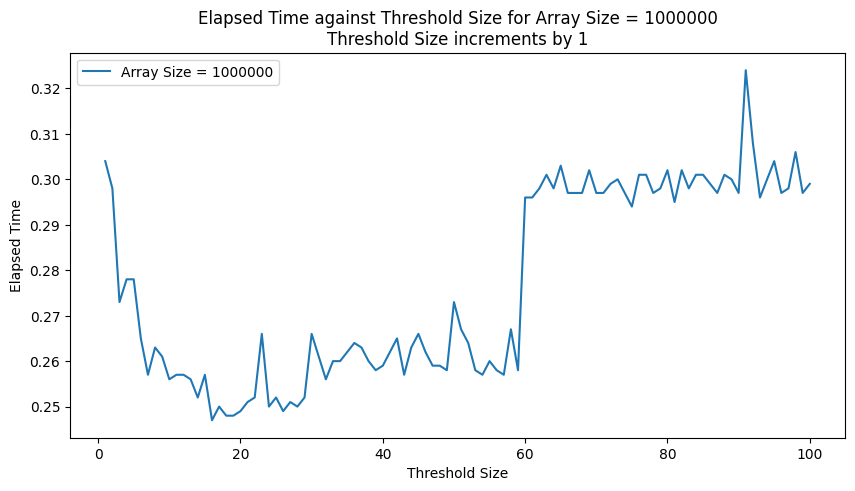

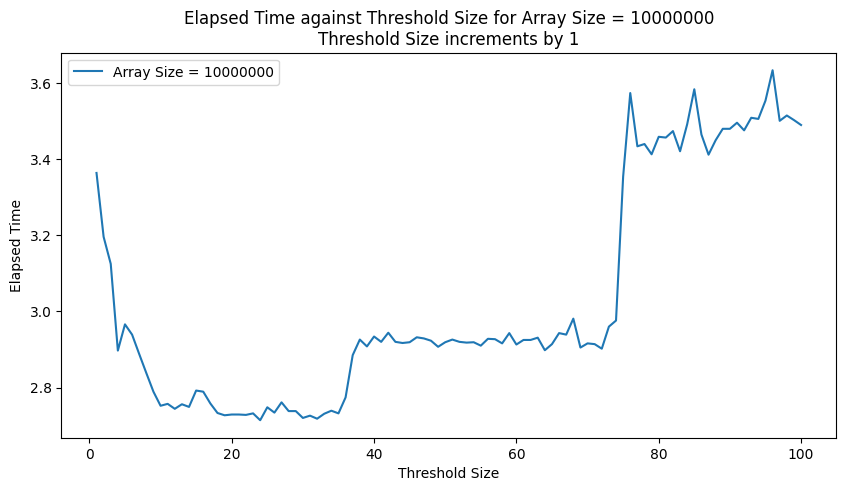

In [100]:
plt.figure(figsize=(10,5))
df = CPart3[CPart3['Array Size'] == 1000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = CPart3[CPart3['Array Size'] == 10000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = CPart3[CPart3['Array Size'] == 100000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 100000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 100000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = CPart3[CPart3['Array Size'] == 1000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = CPart3[CPart3['Array Size'] == 10000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1")

#### Analysis

We notice that for very small datasets, the threshold size in the range of 1 to 100 practically made no difference. This may be due to:

* The use of C Language. Since C is a compiled language, it is much faster in execution. Thus, when array size is very small, the time taken to sort the array is too short to be precisely captured by the system. Hence, any improvements made due to adjustment in threshold size will simply not be visible.

However, for large datasets, we notice that there is no one absolute optimal threshold value, but a region of optimal threshold value such that the elapsed time is minimum. This region is further made obvious for array size = 10 mil, whereby when the threshold value is between 10 and 36, the elapsed time is minimum.

We hypothesize that there is no one universal optimal threshold value as:
* It is affected by the CPU clock speed and architecure.
* It is affected by the programming language used as lower-level programming language such as C is more efficient than higher-level programming languages such as Python.
* It is affected by the compiler used. Certain compilers may optimise codes when compiling which reduces the constant factors in the time complexity.
* Instructions from other programs may be running concurrently with the algorithm which is infeasible to determine. 
* Optimal threshold value for this random dataset may not be the optimal threshold value for another random dataset.

Therefore, on our system, we shall take *s* = 24 to be our optimal *s* value for comparison in the final analysis. This value, however, may be different on other systems, due to the reasons mentioned above.

*We used an AMD Ryzen 5 CPU built on the AMD x86-x64 architecture, running at approximately 2.5Ghz clock speed, and the program is programmed in C17 standard, compiled using GNU GCC compiler.*

## Part D: Final Analysis

Using our optimal value of S, we attempt to compare the hybrid Merge Insertion-Sort algorithm with the Merge Sort algorithm.

In [101]:
# Merge-Insertion Sort
sum_key_comparisons = 0
count = 0
for j in benchmarkD['Key Comparisons']:
    count += 1
    sum_key_comparisons += int(j)
avg_key1 = sum_key_comparisons / 20
print("The average number of key comparsions for Merge-Insertion Sort in 20 trials is", avg_key1)

sum_execution_time = 0.0
for j in benchmarkD['Elapsed Time']:
    sum_execution_time += float(j)
avg_time1 = round(float (sum_execution_time / 20), 2)
print("The average elapsed time for Merge-Insertion Sort in 20 trials is %.2fs" %avg_time1)

# Merge Sort
print("\n")
sum_key_comparisons = 0
for j in benchmarkDMerge['Key Comparisons']:
    sum_key_comparisons += int(j)
avg_key2 = sum_key_comparisons / 20
print("The average number of key comparsions for Merge Sort in 20 trials is", avg_key2)

sum_execution_time = 0.0
for j in benchmarkDMerge['Elapsed Time']:
    sum_execution_time += float(j)
avg_time2 = round(float (sum_execution_time / 20), 2)
print("The average elapsed time for Merge Sort in 20 trials is %.2fs" %avg_time2)

_key_comparisons = (float(avg_key1 /avg_key2) - 1) * 100
_time = float(avg_time2 - avg_time1) / avg_time2 * 100

print("\n\nThe hybrid Merge-Insertion Sort algorithm with S = 24 yields a %.2f%% improvement over the Merge Sort algorithm in terms of runtime with %.2f%% more key comparisons when Array Size = 10 million." %(_time, _key_comparisons))

The average number of key comparsions for Merge-Insertion Sort in 20 trials is 206047042.5
The average elapsed time for Merge-Insertion Sort in 20 trials is 2.81s


The average number of key comparsions for Merge Sort in 20 trials is 183832436.1
The average elapsed time for Merge Sort in 20 trials is 3.79s


The hybrid Merge-Insertion Sort algorithm with S = 24 yields a 25.86% improvement over the Merge Sort algorithm in terms of runtime with 12.08% more key comparisons when Array Size = 10 million.


[Text(0.5, 1.0, 'Key Comparisons against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

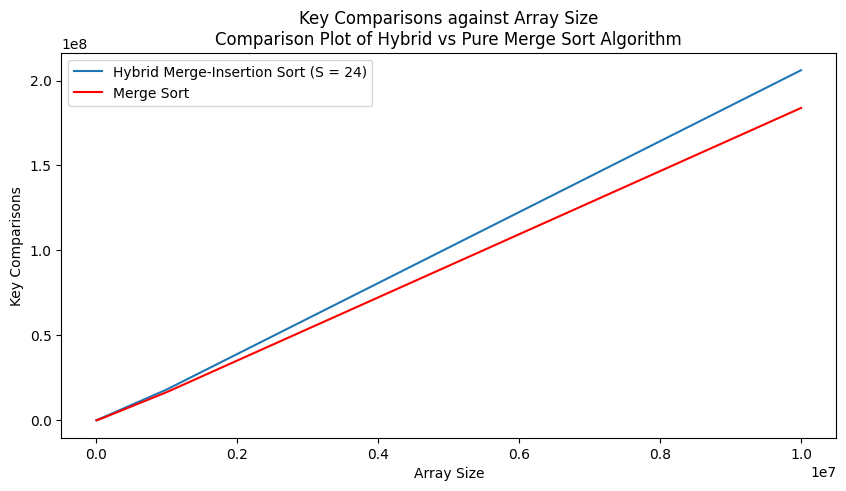

In [102]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= OptimalS, x="Array Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort (S = 24)")
sb.lineplot(data= CPart1Merge, x="Array Size", y="Key Comparisons", label="Merge Sort", color="red")

plot.set(title="Key Comparisons against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")

[Text(0.5, 1.0, 'Elapsed Time against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

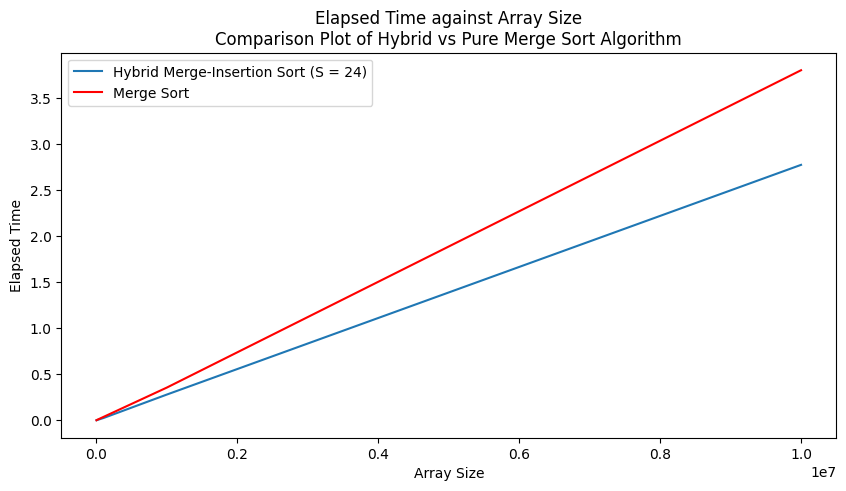

In [103]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= OptimalS, x="Array Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort (S = 24)")
sb.lineplot(data= CPart1Merge, x="Array Size", y="Elapsed Time", label="Merge Sort", color="red")

plot.set(title="Elapsed Time against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")